# Dataset Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Google Trends

In [2]:
files = ['multiTimeline_bitcoin_2015_01_08.csv',
         'multiTimeline_bitcoin_2015_08_12.csv',
         'multiTimeline_bitcoin_2016_01_08.csv',
         'multiTimeline_bitcoin_2016_08_12.csv',
         'multiTimeline_bitcoin_2017_01_08.csv',
         'multiTimeline_bitcoin_2017_08_12.csv',
         'multiTimeline_bitcoin_2018_01_08.csv',
         'multiTimeline_bitcoin_2018_08_12.csv',
         'multiTimeline_bitcoin_2019_01_08.csv',
         'multiTimeline_bitcoin_2019_08_12.csv',
         'multiTimeline_bitcoin_2020_01_08.csv',
         'multiTimeline_bitcoin_2020_08_12.csv',
         'multiTimeline_bitcoin_2021_01_08.csv',
         'multiTimeline_bitcoin_2021_08_10.csv']

In [3]:
def load_format(file):
    df_tmp = pd.read_csv(file,header=1)
    df_tmp['bitcoin_searches_world'] = df_tmp['bitcoin: (Worldwide)']
    df_tmp['date'] = pd.to_datetime(df_tmp['Day'])
    df_tmp.drop('Day',axis=1,inplace=True)
    df_tmp.drop('bitcoin: (Worldwide)',axis=1,inplace=True)
    #df_tmp.set_index('date',inplace=True)
    return df_tmp

In [4]:
df = pd.DataFrame()
for f in files:
    if df.shape[0] == 0:
        df = load_format(f)
    else:
        df_tmp = load_format(f)
        if df['date'].iloc[-1] == df_tmp['date'].iloc[0]:
            # Scale values from the future
            last_value = df['bitcoin_searches_world'].iloc[-1]
            next_value = df_tmp['bitcoin_searches_world'].iloc[0]
            a = last_value / next_value
            df_tmp['bitcoin_searches_world'] = df_tmp['bitcoin_searches_world']*a
            # Remove first day of next df
            df_tmp.drop(index=0,inplace=True)
            # Concatenate both
            df = pd.concat([df,df_tmp],axis=0)
            # New index
            df.index = pd.RangeIndex(df.shape[0])
        else:
            print('ERROR: not matching last and next dates')
            print('\t',df['date'].iloc[-1])
            print('\t',df_tmp['date'].iloc[0])

In [5]:
df.head()

,bitcoin_searches_world,date
0,46.0,2015-01-01
1,54.0,2015-01-02
2,56.0,2015-01-03
3,66.0,2015-01-04
4,62.0,2015-01-05


In [6]:
df.tail()

,bitcoin_searches_world,date
2497,709.923457,2021-11-02
2498,684.108059,2021-11-03
2499,671.200359,2021-11-04
2500,645.384961,2021-11-05
2501,555.031066,2021-11-06


<AxesSubplot:xlabel='date'>

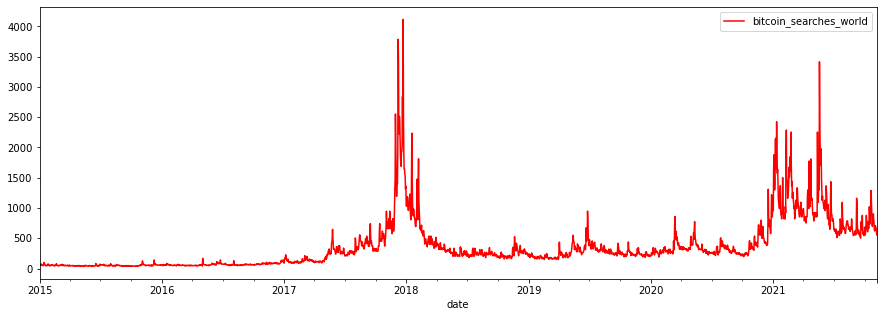

In [7]:
df.plot(x='date',y='bitcoin_searches_world',figsize=(15,5),color='r')

In [8]:
df.to_csv('google_trends_bitcoin_2015_2021_daily.csv',index=False)

## Bitcoin History Prices

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [10]:
#files = ['Bitstamp_BTCUSD_2017_minute.csv',
#         'Bitstamp_BTCUSD_2018_minute.csv',
#         'Bitstamp_BTCUSD_2019_minute.csv',
#         'Bitstamp_BTCUSD_2020_minute.csv',
#         'Bitstamp_BTCUSD_2021_minute.csv']
files = ['Gemini_BTCUSD_2015_1min.csv',
         'Gemini_BTCUSD_2016_1min.csv',
         'Gemini_BTCUSD_2017_1min.csv',
         'Gemini_BTCUSD_2018_1min.csv',
         'Gemini_BTCUSD_2019_1min.csv',
         'Gemini_BTCUSD_2020_1min.csv',
         'Gemini_BTCUSD_2021_1min.csv']

In [11]:
df_tmp = pd.read_csv(files[5],header=0)

In [12]:
df_tmp.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1609459140000,2020-12-31 23:59:00,BTCUSD,28993.75,28995.49,28951.44,28979.74,0.337088
1,1609459080000,2020-12-31 23:58:00,BTCUSD,29017.39,29019.86,28993.75,28993.75,0.079929
2,1609459020000,2020-12-31 23:57:00,BTCUSD,29035.97,29035.97,29017.39,29017.39,0.013799
3,1609458960000,2020-12-31 23:56:00,BTCUSD,29036.19,29036.19,29022.59,29035.97,0.199008
4,1609458900000,2020-12-31 23:55:00,BTCUSD,29043.69,29043.69,29025.75,29036.19,0.082642


In [13]:
def load_history_prices(file):
    df_tmp = pd.read_csv(file,header=0)
    df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])
    df_tmp.drop('Unix Timestamp',axis=1,inplace=True)
    df_tmp.drop('Symbol',axis=1,inplace=True)
    df_tmp['Volume BTC'] = df_tmp['Volume']
    df_tmp.drop('Volume',axis=1,inplace=True)
    df_tmp = df_tmp.iloc[::-1]
    #df_tmp.index = pd.RangeIndex(df_tmp.shape[0])
    #df_tmp['year'] = df_tmp['date'].apply(lambda time: time.year)
    # date, open, high, low, close, Volume BTC, Volume USD
    # Resample Hourly
    df_tmp.set_index('Date',inplace=True)
    open_ = df_tmp['Open'].resample(rule='H').first()
    high_ = df_tmp['High'].resample(rule='H').max()
    low_ = df_tmp['Low'].resample(rule='H').min()
    close_ = df_tmp['Close'].resample(rule='H').last()
    vol_btc = df_tmp['Volume BTC'].resample(rule='H').sum()
    #vol_usd = df_tmp['Volume USD'].resample(rule='H').sum()
    df = pd.concat([open_, high_, low_,close_, vol_btc],axis=1)
    return df

In [14]:
df_tmp = load_history_prices(files[1])

<AxesSubplot:xlabel='Date'>

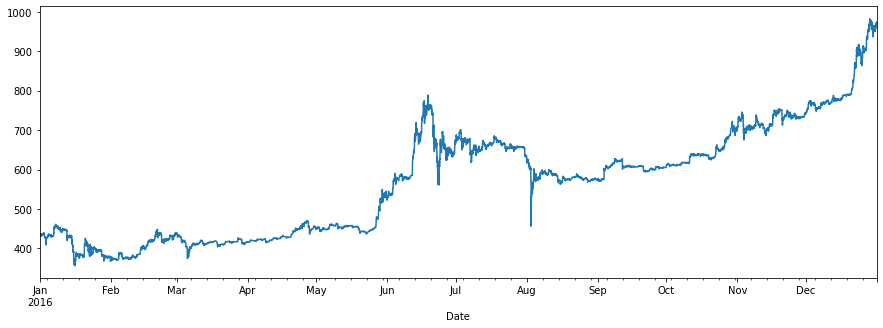

In [15]:
df_tmp['Close'].plot(figsize=(15,5))

In [16]:
df_tmp.describe()

,Open,High,Low,Close,Volume BTC
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,566.857495,567.831346,565.892696,566.919495,62.091135
std,137.993973,138.372320,137.646343,138.054783,165.920461
min,355.560000,359.330000,353.320000,355.560000,0.000000
25%,429.987500,430.982500,429.830000,429.990000,3.090150
50%,581.390000,582.015000,580.980000,581.410000,19.640369
75%,662.730000,663.990000,661.092500,662.822500,64.501751
max,982.470000,985.430000,978.490000,982.470000,3176.491887


In [17]:
df = pd.DataFrame()
for f in files:
    if df.shape[0] == 0:
        df = load_history_prices(f)
    else:
        df_tmp = load_history_prices(f)
        # Concatenate both
        df = pd.concat([df,df_tmp],axis=0)

<AxesSubplot:xlabel='Date'>

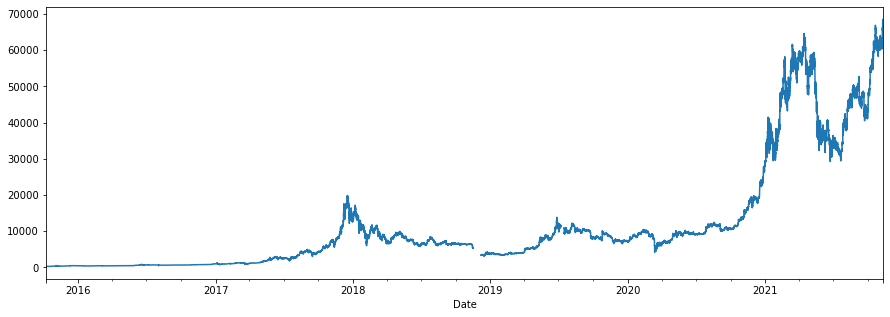

In [18]:
df['Close'].plot(figsize=(15,5))

In [19]:
df.to_csv('Gemini_BTCUSD_2015_2021_hourly.csv',index=True)

In [20]:
start = dt.datetime(2018,5,15,7,0,0)
end = dt.datetime(2019,5,15,7,0,0)

<AxesSubplot:xlabel='Date'>

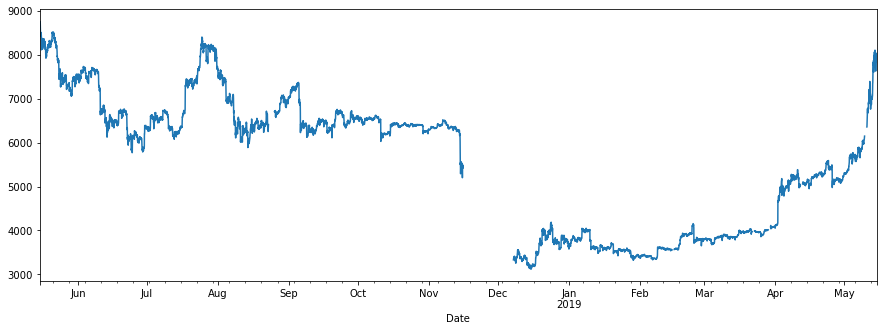

In [21]:
df['Low'].loc[start:end].plot(figsize=(15,5))

In [22]:
# Halving 2016: 2016-07-09
# ATH 2017: 2017-12-17
start = dt.datetime(2016,7,9,0,0,0)
end = dt.datetime(2017,12,17,0,0,0)
#end = dt.datetime(2017,9,15,0,0,0)
# Halving 2020: 2020-05-11
# ATH 2021: ?
start = dt.datetime(2020,5,11,0,0,0)
end = dt.datetime(2021,11,8,0,0,0)
duration_days = (end-start).days

In [23]:
duration_days

546

In [24]:
df.loc[start:end].shape

(13105, 5)

<AxesSubplot:xlabel='Date'>

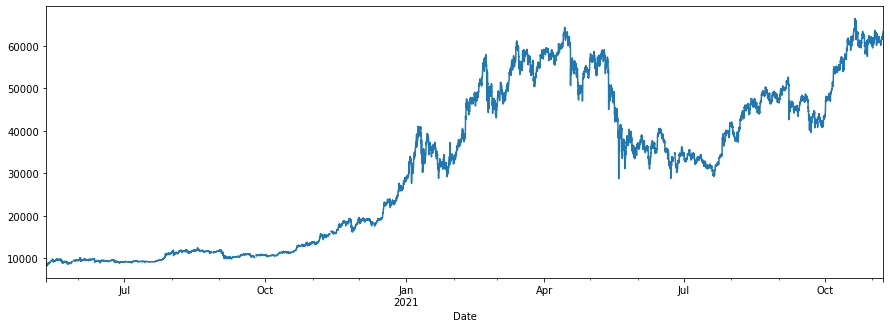

In [25]:
df['Low'].loc[start:end].plot(figsize=(15,5))

## ETH/BTC History Prices

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [27]:
files = ['Bitstamp_ETHUSD_2017_minute.csv',
         'Bitstamp_ETHUSD_2018_minute.csv',
         'Bitstamp_ETHUSD_2019_minute.csv',
         'Bitstamp_ETHUSD_2020_minute.csv',
         'Bitstamp_ETHUSD_2021_minute.csv']

In [28]:
df_tmp = pd.read_csv(files[0],header=0)

In [29]:
df_tmp.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1514764740,2017-12-31 23:59:00,ETH/USD,743.84,743.84,743.48,743.48,10.114794,7520.146694
1,1514764680,2017-12-31 23:58:00,ETH/USD,743.54,744.00,743.54,744.00,8.469397,6301.231338
2,1514764620,2017-12-31 23:57:00,ETH/USD,742.00,742.00,742.00,742.00,0.000000,0.000000
3,1514764560,2017-12-31 23:56:00,ETH/USD,742.00,742.00,742.00,742.00,5.138860,3813.034239
4,1514764500,2017-12-31 23:55:00,ETH/USD,742.00,742.00,742.00,742.00,1.257661,933.184662


In [30]:
def load_ethbtc_history_prices(file):
    df_tmp = pd.read_csv(file,header=0)
    df_tmp['Date'] = pd.to_datetime(df_tmp['date'])
    df_tmp.drop('unix',axis=1,inplace=True)
    df_tmp.drop('symbol',axis=1,inplace=True)
    df_tmp = df_tmp.iloc[::-1]
    # Resample Hourly
    df_tmp.set_index('Date',inplace=True)
    open_ = df_tmp['open'].resample(rule='H').first()
    high_ = df_tmp['high'].resample(rule='H').max()
    low_ = df_tmp['low'].resample(rule='H').min()
    close_ = df_tmp['close'].resample(rule='H').last()
    vol_eth = df_tmp['Volume ETH'].resample(rule='H').sum()
    vol_usd = df_tmp['Volume USD'].resample(rule='H').sum()
    df = pd.concat([open_, high_, low_,close_, vol_eth, vol_usd],axis=1)
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume ETH', 'Volume USD']
    return df

In [31]:
df_tmp = load_ethbtc_history_prices(files[1])

In [32]:
df_tmp.head()

,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,
2018-01-01 00:00:00,742.00,743.00,731.61,735.78,642.923269,474242.843804
2018-01-01 01:00:00,735.78,736.52,726.01,728.21,466.912306,340613.807534
2018-01-01 02:00:00,727.47,730.69,723.86,727.20,133.753139,97288.092128
2018-01-01 03:00:00,727.07,736.94,723.47,736.45,500.304717,366235.588369
2018-01-01 04:00:00,736.45,748.00,733.65,747.32,764.498768,567593.695444


<AxesSubplot:xlabel='Date'>

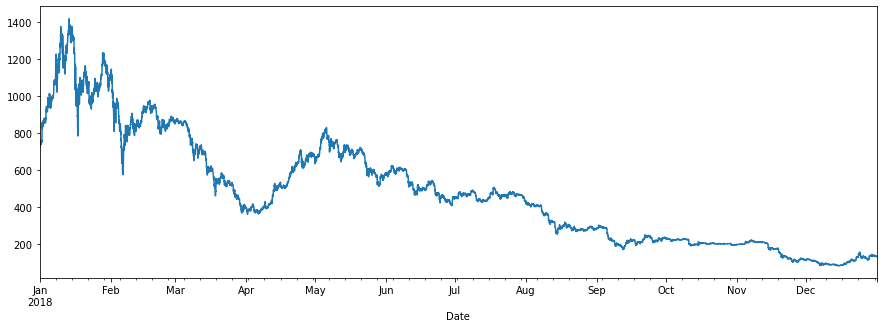

In [33]:
df_tmp['Close'].plot(figsize=(15,5))

In [34]:
df = pd.DataFrame()
for f in files:
    if df.shape[0] == 0:
        df = load_ethbtc_history_prices(f)
    else:
        df_tmp = load_ethbtc_history_prices(f)
        # Concatenate both
        df = pd.concat([df,df_tmp],axis=0)

<AxesSubplot:xlabel='Date'>

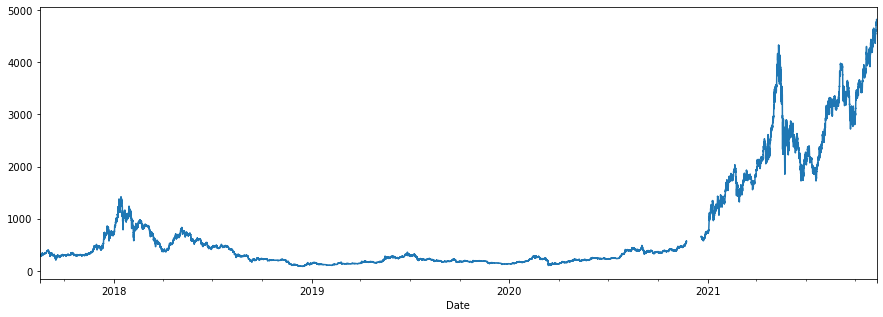

In [35]:
df['Close'].plot(figsize=(15,5))

In [36]:
df.to_csv('Bitstamp_ETHUSD_2017_2021_hourly.csv',index=True)